In [1]:
from scripts.shared_utilities import *

2024-06-05 13:14:14.729841: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 13:14:14.733828: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 13:14:14.778722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 13:14:15.616428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Qui prendo un modello convoluzionale nuovo e lo addestro da subito dandogli in pasto i passi+date e chiedendogli di predire l'andamento medio dei passi nei prossimi giorni.

In [2]:
model = KerasCNNModel(path=Path("../models/modello-passi-sonno-CNN.keras"),load=True)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 20)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           961 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,801 (26.57 KB)

 Trainable params: 6,801 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

Come si può vedere, qui la cosa più importante è che adesso stiamo usando le medie, che quindi permettono di avere molto meno rumore.

In [ ]:
data = DateStepSleepData(step_type="n_steps_all",sleep_score="mn_sleep_score_all",dataset_chunk=DEFAULT_CHUNK_SIZE*10)
data.get_dataset().describe()

In [ ]:
utils = Utilities(model, data)

In [ ]:
utils.train_model()

In [6]:
utils.evaluate_model()

1453/1453 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4075 - r2_score: -0.0141


[0.4376709759235382, -0.04760134220123291]

In [7]:
model.save()

È possibile vedere dai grafici che questo modello possiede una buona capacità di prevedere gli andamenti. Questo è evidente soprattutto nei casi in cui ci sono porzioni di dati mancanti e lui riesce a dare un'ipotesi plausibile di ciò che manca. Ricordo che sono dati mai visti.
Il modello si basa solamente sui passi (sotto) e tenta di approssimare l'andamento del sonno (sopra) di cui vediamo sia i fatti singoli che la versione allisciata. 
Purtroppo il sonno è una cosa che varia molto ed è influenzata da innumerevoli fattori fisici e psicologici che non sono tutti rappresentati dai passi.

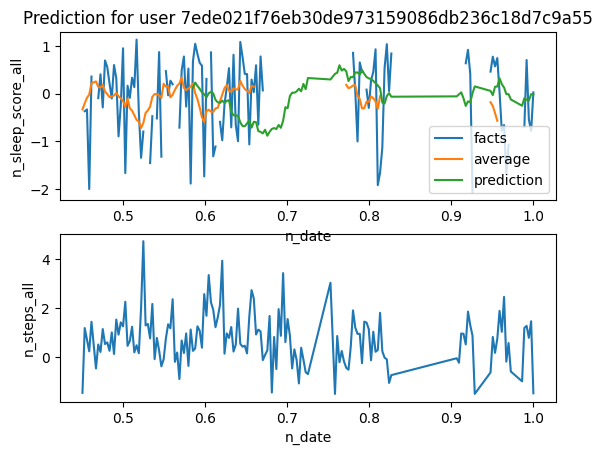

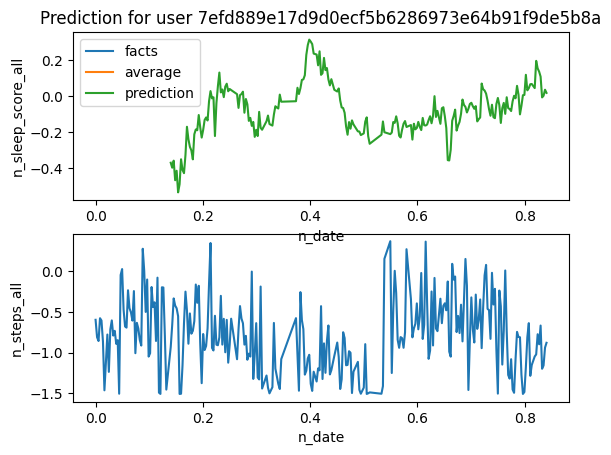

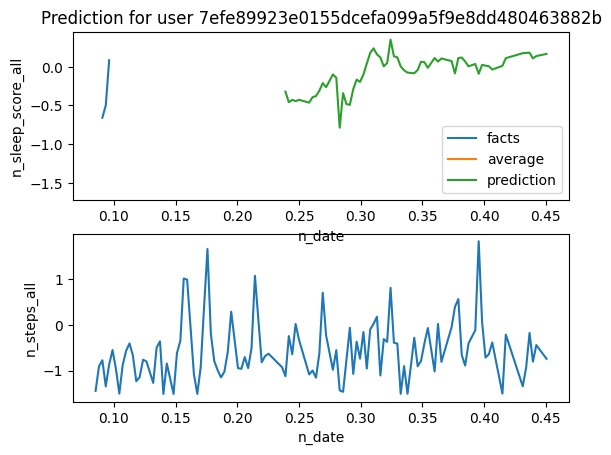

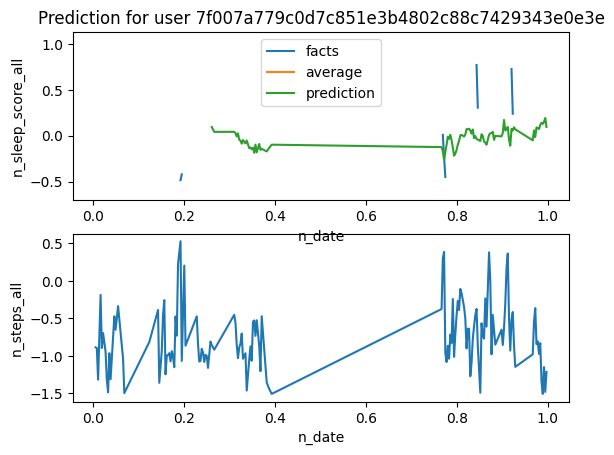

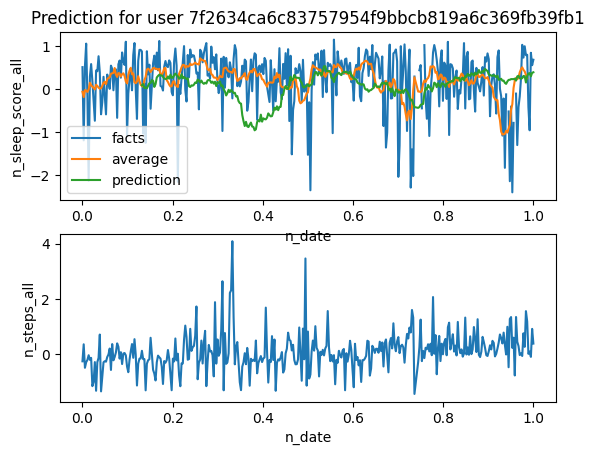

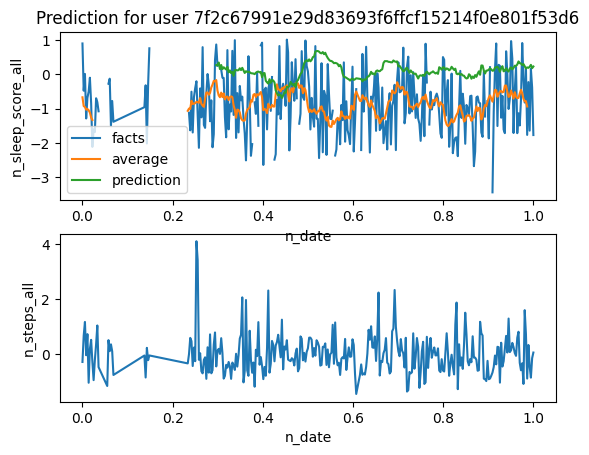

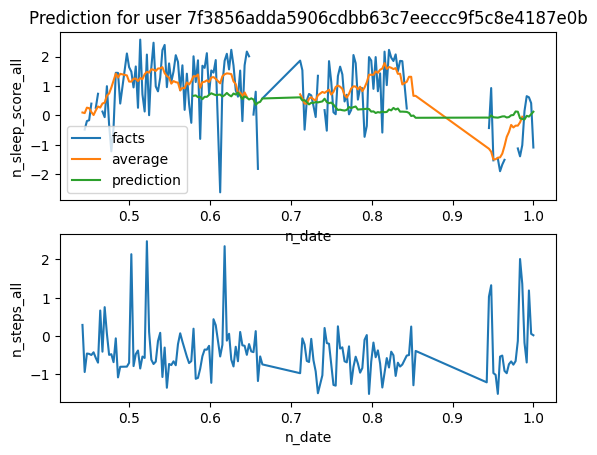

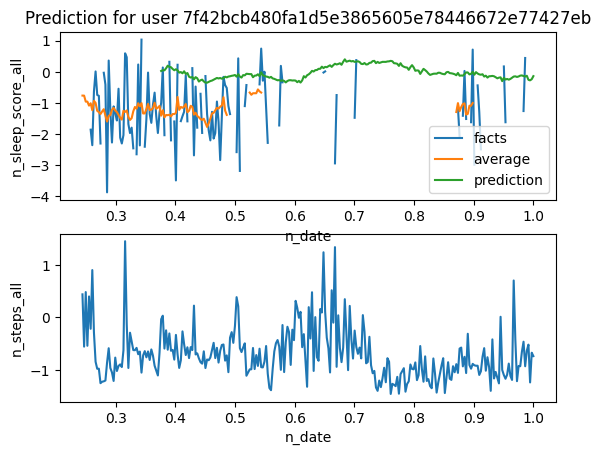

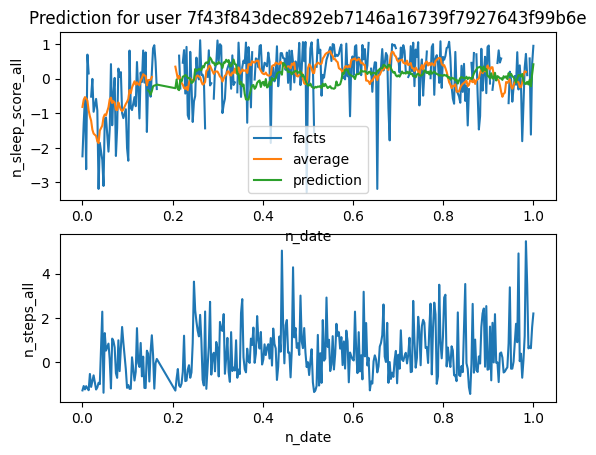

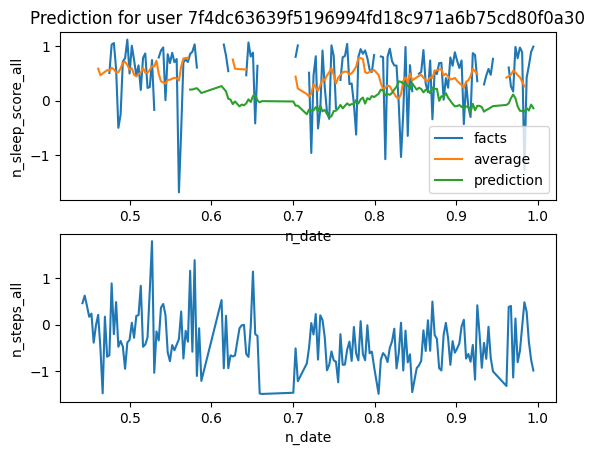

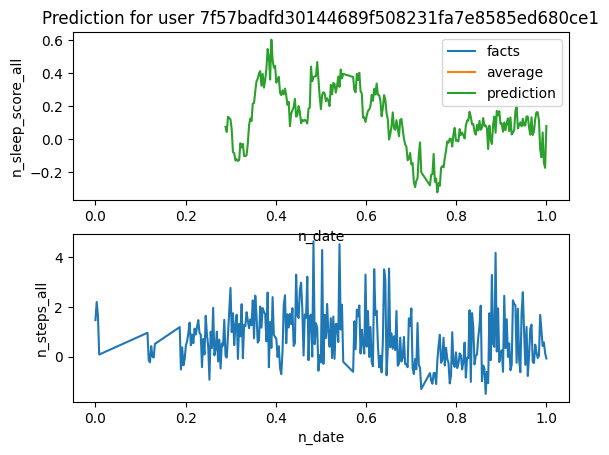

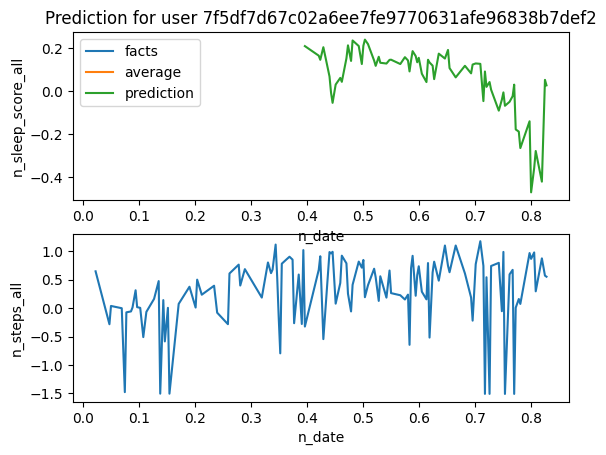

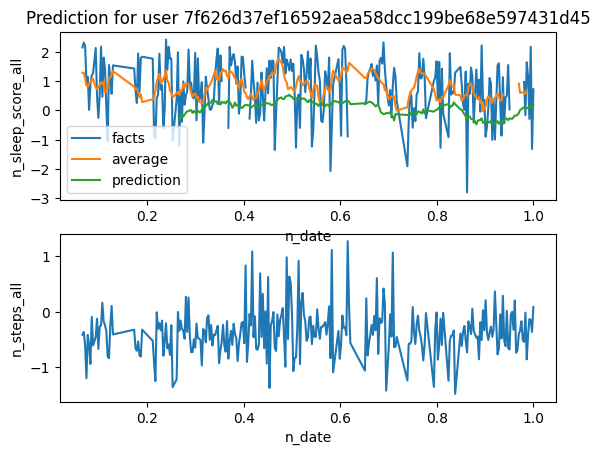

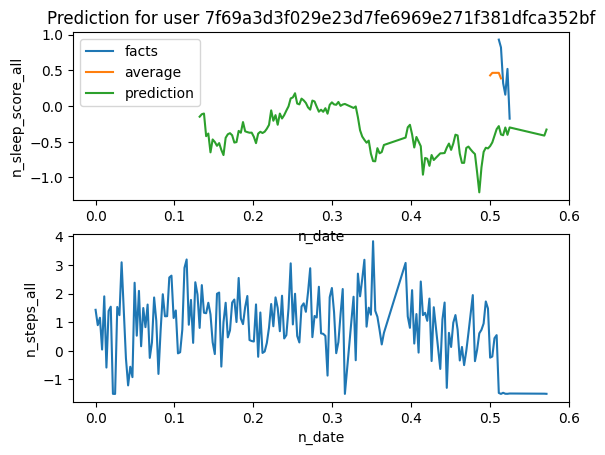

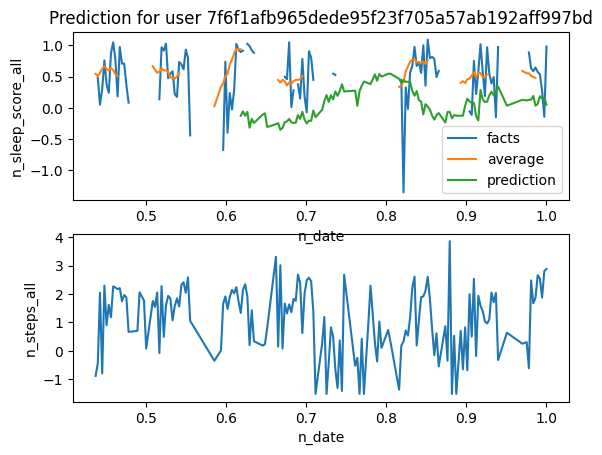

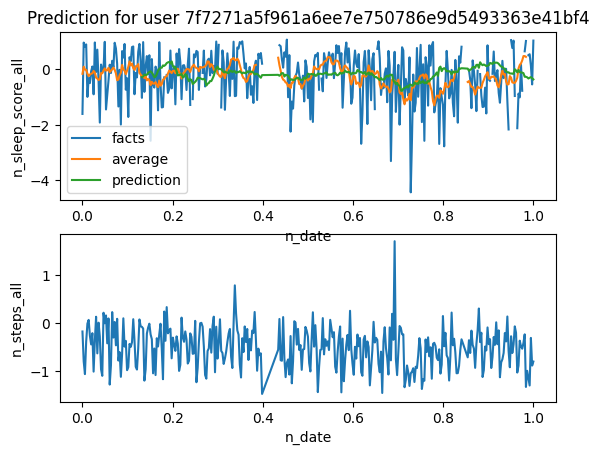

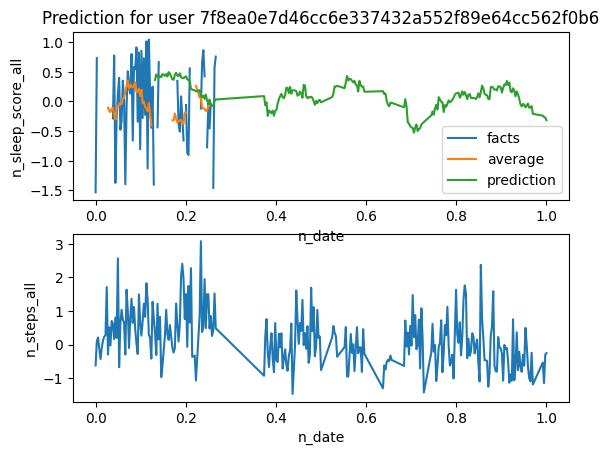

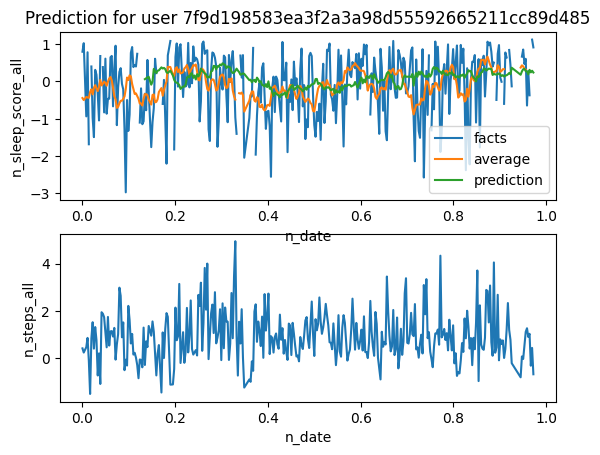

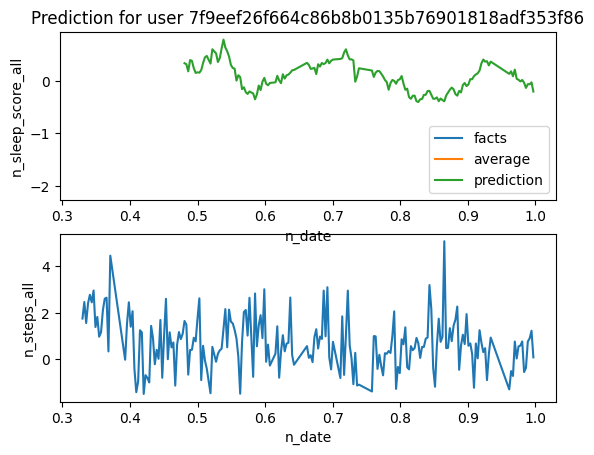

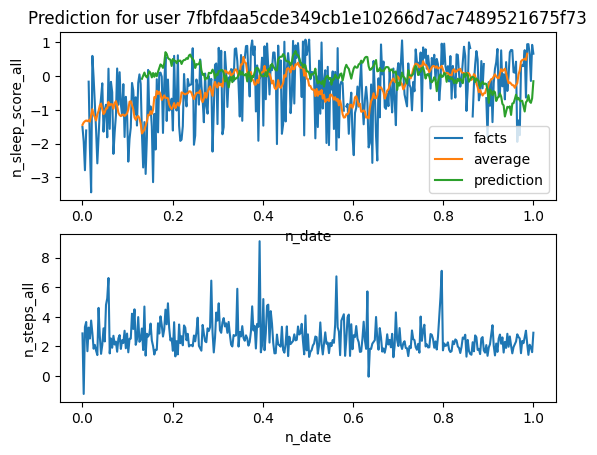

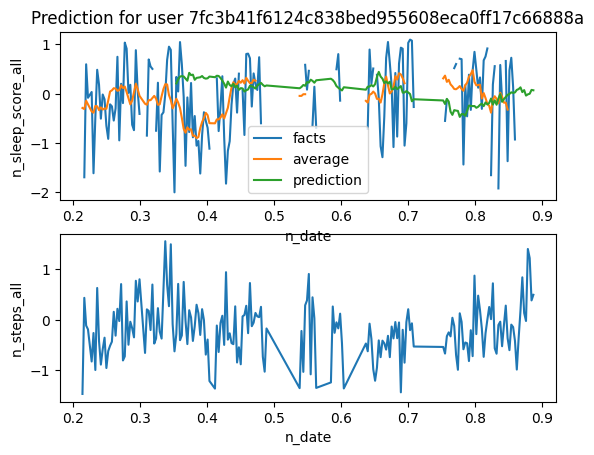

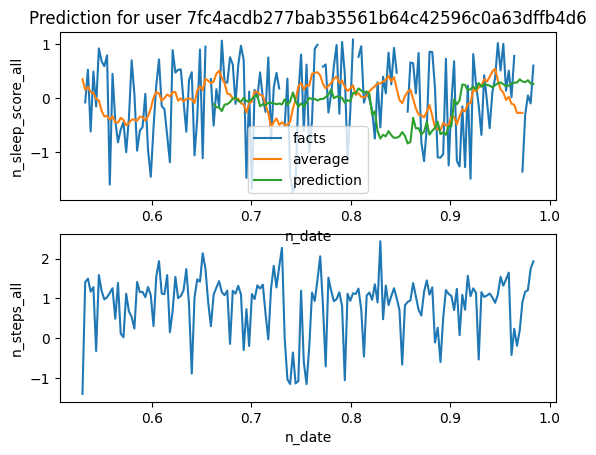

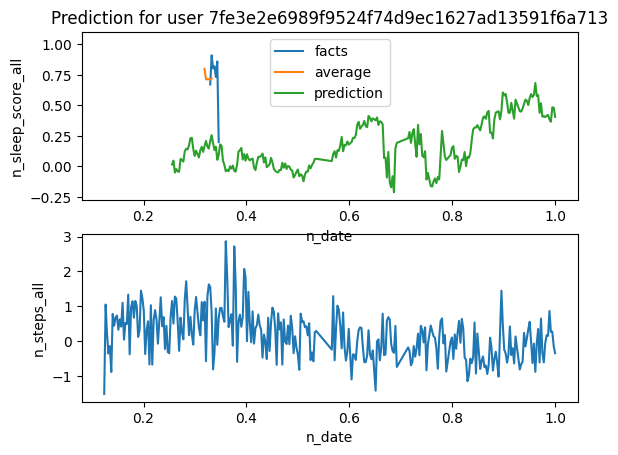

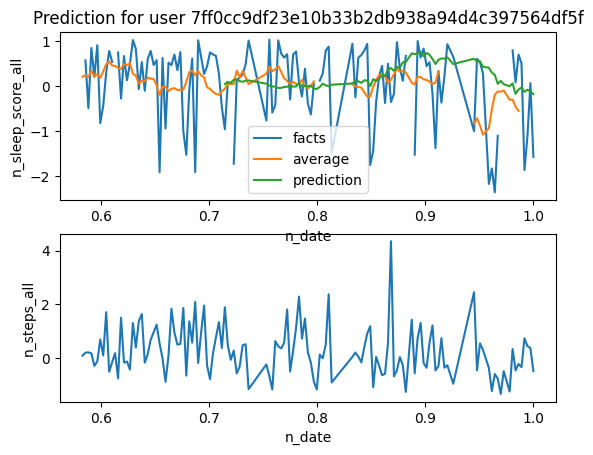

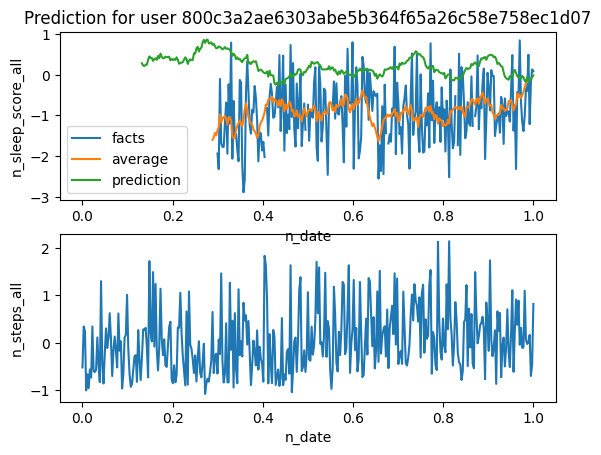

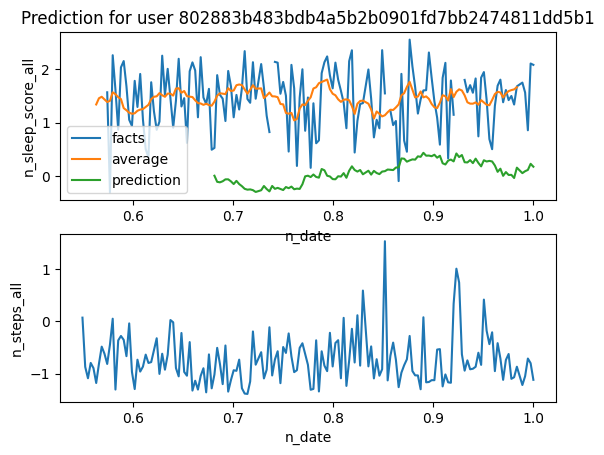

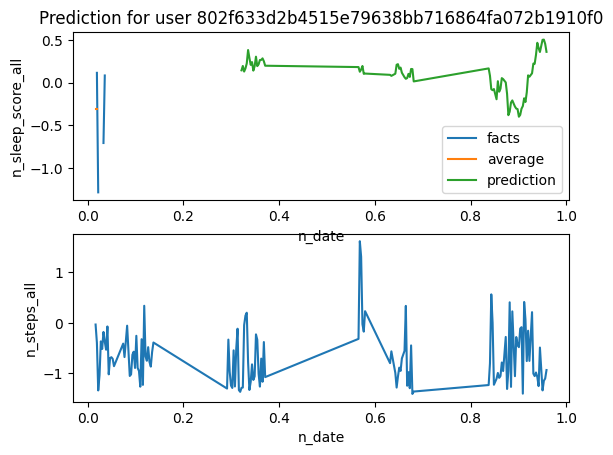

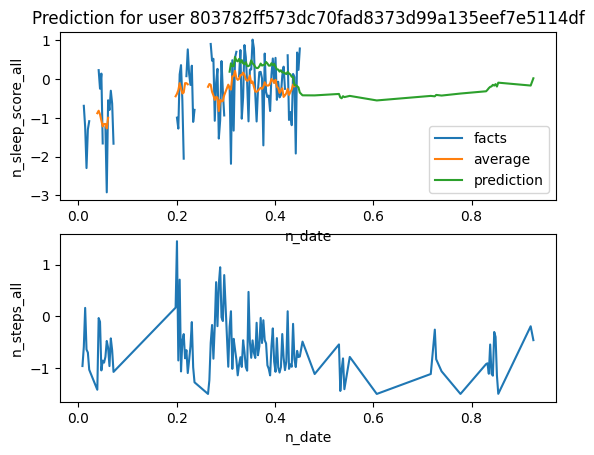

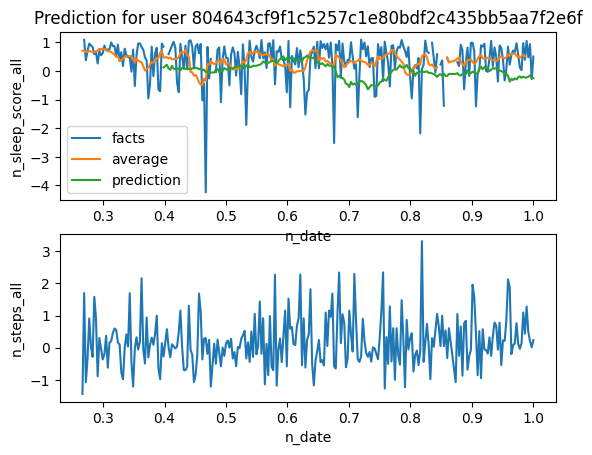

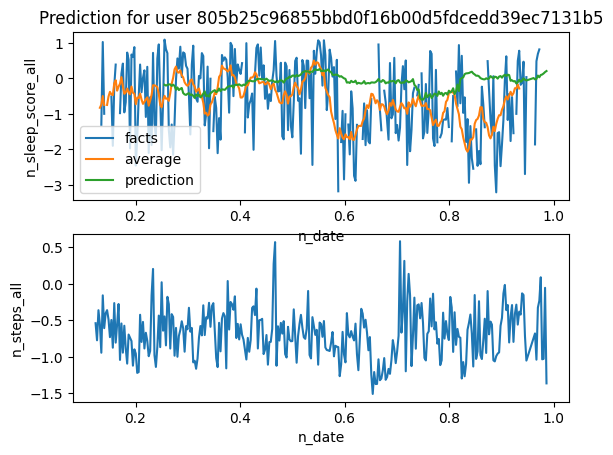

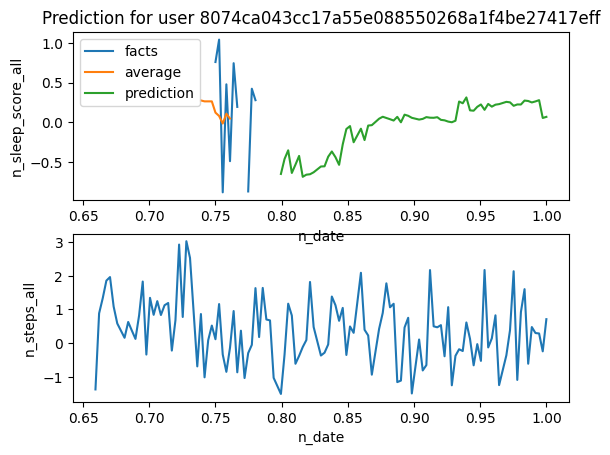

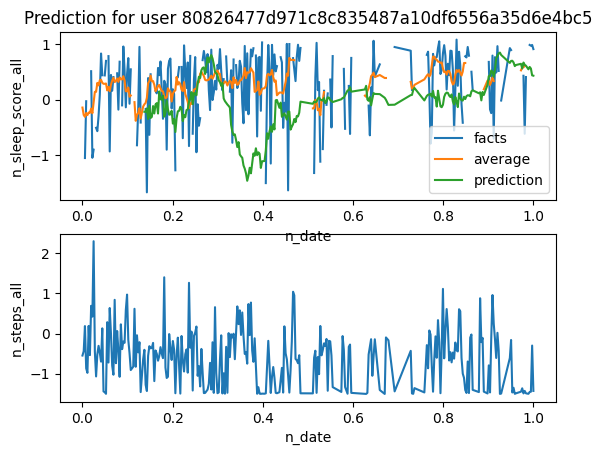

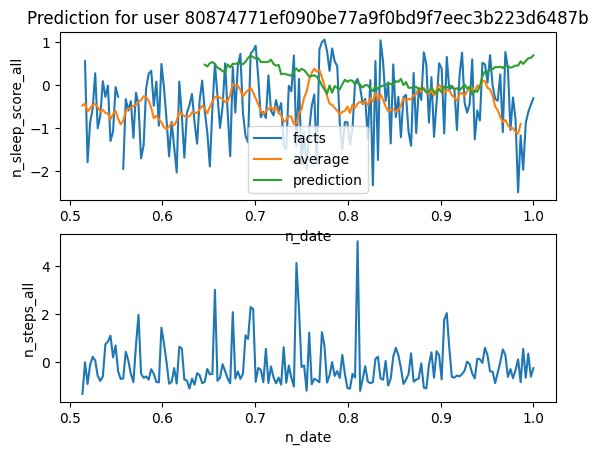

In [8]:
DateMeanSleepStepPredictionVisualization(model, data = DateStepSleepData(sleep_score="n_sleep_score_all",chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE*10)).visualize()